### Capturing images from a mono camera

In [12]:
import numpy as np
import cv2
import time
import os

cam = cv2.VideoCapture(0)

i = 0

while(True):
    success, frame = cam.read()
    
    if (success == False):
        print("Cannot read frame")
        
        break
    
    key = cv2.waitKey(20) & 0xFF
    
    if (key == ord('q')):
        break
    
    elif (key == 32): #space
        cv2.imwrite("calib/" + str(i) + ".jpg", frame)
        i += 1
    
    cv2.imshow("frame", frame)

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

### Recording video from a mono camera

In [ ]:
import numpy as np
import cv2
import time

cam = cv2.VideoCapture(0)

assert success

success, frame = cam.read()
w, h, _ = frame.shape

out = cv2.VideoWriter("outpy" + str(time.time()) + ".avi",
                      cv2.VideoWriter_fourcc('M','J','P','G'), 30, (h, w))

record = False

while(True):
    success, frame = cam.read()
    
    if (success == False):
        print("Cannot read frame")
        
        break
    
    if (record == True):
        out.write(frame)
        
        cv2.circle(frame, (50, 50), 20, (0, 0, 250), -1)
    
    key = cv2.waitKey(20) & 0xFF

    if (key == ord('w')):
        record = not record
    
    if (key == ord('q')):
        break
    
    elif (key == 32): #space
        cv2.imwrite("calib/" + str(i) + ".jpg", frame)
        i += 1
    
    cv2.imshow("frame", frame)

out.release()
cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

### Finding corners of a chessboard

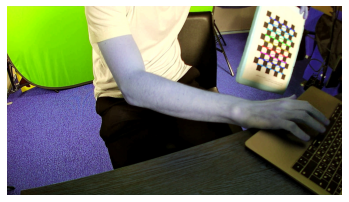

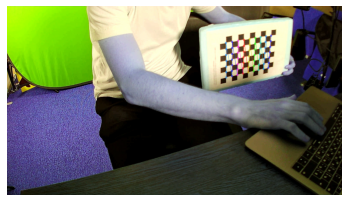

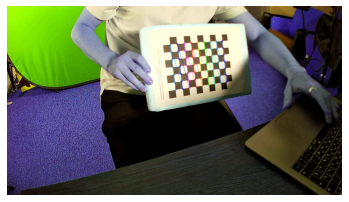

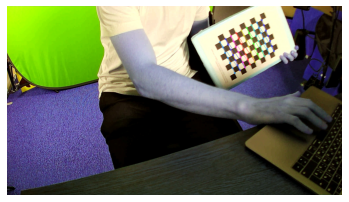

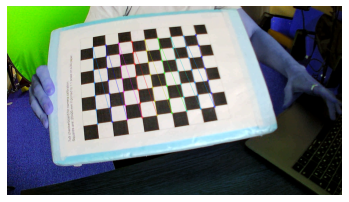

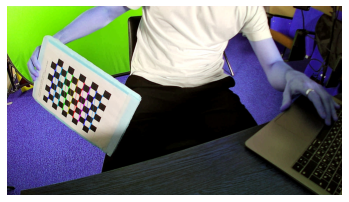

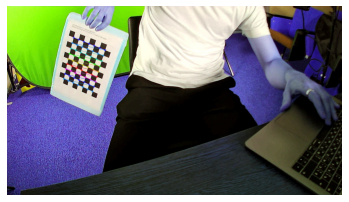

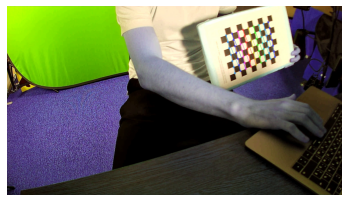

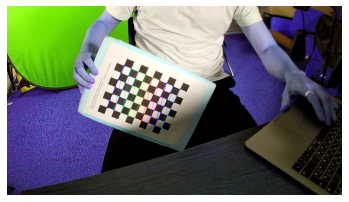

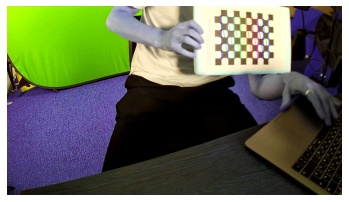

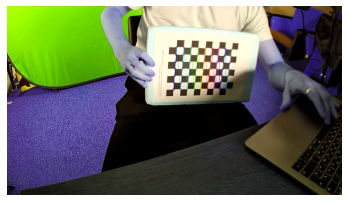

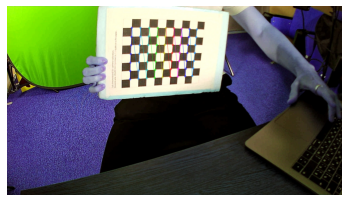

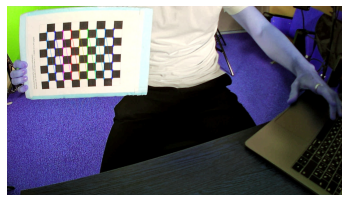

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:9].T.reshape(-1,2) * 0.02

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('calib/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 9),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7, 9), corners2,ret)
        
        plt.imshow (img)
        plt.axis ('off')
        plt.show ()
        #cv2.imshow('img',img)
        
        cv2.waitKey(50)

cv2.destroyAllWindows()

### Camera calibration

In [2]:
import cv2

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,
                gray.shape[::-1],None,None)#, flags=cv2.CALIB_TILTED_MODEL)

print("ret", ret)

print("\nmtx", mtx)

print("\ndist", dist)

print("\nrvecs")

for i in range(7):
    print(rvecs[i])
    print("")

print("\ntvecs")

for i in range(7):
    print(tvecs[i])
    print("")

ret 0.47051700823144316

mtx [[1.41375958e+03 0.00000000e+00 9.71161343e+02]
 [0.00000000e+00 1.40390397e+03 5.88196215e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

dist [[-0.34890304  0.09987185  0.00148232  0.00084038  0.01875166]]

rvecs
[[ 0.30487693]
 [-0.37788957]
 [ 0.22199064]]

[[ 0.34498916]
 [-0.67863599]
 [ 1.30393551]]

[[-0.1704003 ]
 [-0.40860352]
 [ 1.39556112]]

[[ 0.35991899]
 [-0.40034072]
 [ 0.99934086]]

[[-0.34688127]
 [ 0.12500157]
 [ 1.38686593]]

[[ 0.28948815]
 [ 0.4584483 ]
 [-0.96801333]]

[[ 0.52575079]
 [-0.01482456]
 [ 0.42893797]]


tvecs
[[ 0.29630105]
 [-0.28988451]
 [ 0.69143101]]

[[ 0.29575364]
 [-0.23119401]
 [ 0.70247905]]

[[ 0.13075604]
 [-0.19539601]
 [ 0.678671  ]]

[[ 0.27121792]
 [-0.28528288]
 [ 0.70982928]]

[[ 0.03030325]
 [-0.11593925]
 [ 0.37249489]]

[[-0.375402  ]
 [-0.03229204]
 [ 0.64376326]]

[[-0.33321338]
 [-0.23259613]
 [ 0.71722699]]



### Distance to a chessboard pattern

In [2]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
import math

# A = np.array([[1.43375330e+03, 0.00000000e+00, 9.59754528e+02],
#               [0.00000000e+00, 1.42562382e+03, 5.92222278e+02],
#               [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# dist = np.array([[-0.38840459,  0.15585353, -0.00261017, -0.00065496, -0.02653892]])

A = np.array([[1.41375958e+03, 0.00000000e+00, 9.71161343e+02],
              [0.00000000e+00, 1.40390397e+03, 5.88196215e+02],
              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-0.34890304,  0.09987185,  0.00148232,  0.00084038,  0.01875166]])

objp = np.zeros((9*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:9].T.reshape(-1,2) * 0.02

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

filename = 0#"outpy1694191193.58813.avi"

cam = cv2.VideoCapture(0)#filename)

while(True):
    success, frame = cam.read()
    
    if (success == False):
        #print("Cannot read frame. Exiting")
        #break
        
        cam.release()
        cam = cv2.VideoCapture(filename)
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7, 9), None)

    if (ret == True):
        s, rvec, tvec = cv2.solvePnP(objp, corners, A, dist, flags=0)

        if (s == False):
            continue
        
        #print(rvec)
        
        srvec = "rvec: " + str(rvec[0][0])[:5] + " " + str(rvec[1][0])[:5] + " " + str(rvec[2][0])[:5]
        image = cv2.putText(frame, srvec, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                           1.5, (255, 255, 0), 2, cv2.LINE_AA)

        stvec = "tvec: " + str(tvec[0][0])[:5] + " " + str(tvec[1][0])[:5] + " " + str(tvec[2][0])[:5]
        image = cv2.putText(frame, stvec, (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 
                           1.5, (255, 255, 0), 2, cv2.LINE_AA)
        
        #thanks to https://answers.opencv.org/question/217179/angle-between-wall-and-camera-using-pnpransac-and-its-precision/
        Rt = cv2.Rodrigues(rvec)
        Rt = np.transpose(Rt[0])
        sy = math.sqrt(Rt[0, 0] * Rt[0, 0] + Rt[1, 0] * Rt[1, 0])
        singular = sy < 1e-6

        # rotation matrix to Euler Angles
        if not singular:
            x = math.atan2(Rt[2,1] , Rt[2,2] )* (180 / np.pi)
            y = math.atan2(-Rt[2,0], sy) * (180 / np.pi)
            z = math.atan2(Rt[1,0], Rt[0,0]) * (180 / np.pi)

        else:
            x = math.atan2(-Rt[1,2], Rt[1,1]) * (180 / np.pi)
            y = math.atan2(-Rt[2,0], sy)* (180 / np.pi)
            z = 0
        
        image = cv2.putText(frame, str(x)[:5] + " " +
                                   str(y)[:5] + " " +
                                   str(z)[:5], (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 
                           1.5, (255, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("frame", frame)

    key = cv2.waitKey(70) & 0xFF
        
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

#     # If found, add object points, image points (after refining them)
#     if ret == True:
#         objpoints.append(objp)

#         corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
#         imgpoints.append(corners2)

#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (7, 9), corners2,ret)
        
#         plt.imshow (img)
#         plt.axis ('off')
#         plt.show ()
#         #cv2.imshow('img',img)
        
#         cv2.waitKey(50)

-1

### Distance to an object of known size

In [8]:
import numpy as np
import cv2

cam = cv2.VideoCapture(0)

d0 = 0.38
h0 = 236

while(True):
    success, frame = cam.read()
    
    if (success == False):
        print("Cannot read frame. Exiting")
        break
    
    blurred = cv2.blur(frame, (7, 7))
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (99, 185, 98), (138, 253, 255))
    
    cv2.imshow("mask", mask)
    
    connectivity = 4
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    
    num_labels = output[0]
    labels = output[1]
    stats = output[2]
    
    obj_h = 0.0000000001
    
    for i in range(1, num_labels):
        a = stats[i, cv2.CC_STAT_AREA]
        t = stats[i, cv2.CC_STAT_TOP]
        l = stats[i, cv2.CC_STAT_LEFT]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        
        if (a >= 4500):
            cv2.rectangle(frame, (l, t), (l + w, t + h), (212, 123, 234), 4)
            
            obj_h = h
            
            print(h)
            
            break
    
    distance = d0 * h0 / obj_h
    
    image = cv2.putText(frame, str(distance)[:5], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                           0.8, (255, 255, 0), 1, cv2.LINE_AA)
    
    cv2.imshow("frame", frame)

    key = cv2.waitKey(30) & 0xFF
        
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

157
203
233
232
233
236
235
235
235
235
236
234
236
236
235
237
238
237
237
237
238
237
237
238
237
236
238
238
238
237
237
238
238
237
238
239
239
238
240
240
242
242
242
242
242
243
242
243
242
242
242
242
242
244
243
244
246
248
247
247
247
247
247
248
247
248
248
248
247
248
248
248
248
249
251
253
255
256
256
255
256
255
255
258
264
262
262
263
262
263
263
263
263
263
263
265
265
265
264
265
265
264
264
263
263
263
264
263
263
262
263
262
263
262
262
262
262
263
262
262
262
263
263
263
263
263
262
266
270
266
277
281
286
288
284
281
280
280
277
270
268
268
268
269
270
270
272
276
276
274
275
276
278
277
278
277
276
276
276
278
277
276
276
273
272
274
273
271
272
270
263
232
187
233
233
234
233
234
181
172
237
237
237
237
237
238
236
236
236
236
235
236
236
235
235
235
235
235
233
235
234
233
233
231
231
231
233
240
246
252
256
262
266
265
266
265
125
126
126
125
125
126
125
126
124
158
179
185
183
186
188
181
179
162
156
258
258
258
258
259
260
260
260
259
259
259
163
258
258
257


-1

### pic2r

Реализуйте функцию pic2r. Несколько значений для самопроверки:

A = np.array([[1.41375958e+03, 0.00000000e+00, 9.71161343e+02],

             [0.00000000e+00, 1.40390397e+03, 5.88196215e+02],

              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

print(pic2r(A, 0.1, 0.3, 200, 300, 0.7))

(-4.597283365696613, 6.729103927110409)

print(pic2r(A, 0.3, 0.4, 200, 700, 0.7))

(-1.0994367379418493, 1.0691625845841906)

In [11]:
import numpy as np
import math

# A - matrix of intrinsic parameters
# a - angle of rotation of the camera around vertical axis
# b - inclination angle of the camera
# x, y - coordinates of the object in the picture
# h - height of the camera above the ground

def pic2r(A, alpha, beta, x, y, h):
    fx = A[0, 0]
    fy = A[1, 1]
    cx = A[0, 2]
    cy = A[1, 2]
    
    #YOUR CODE BELOW
    
    
    
    #YOUR CODE ABOVE
    
    return rotated[0], rotated[1]

A = np.array([[1.41375958e+03, 0.00000000e+00, 9.71161343e+02],
              [0.00000000e+00, 1.40390397e+03, 5.88196215e+02],
              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-0.34890304,  0.09987185,  0.00148232,  0.00084038,  0.01875166]])

#print(pic2r(A, 0.3, 0.45, 10, 30, 10))

import numpy as np
import cv2

cam = cv2.VideoCapture(0)

x, y = 0, 0

while(True):
    success, frame = cam.read()
    
    if (success == False):
        print("Cannot read frame. Exiting")
        break
    
    blurred = cv2.blur(frame, (7, 7))
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (99, 185, 98), (138, 253, 255))
    
    cv2.imshow("mask", mask)
    
    connectivity = 4
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    
    num_labels = output[0]
    labels = output[1]
    stats = output[2]
    
    filtered = np.zeros_like(mask)
    
    obj_h = 0
    
    for i in range(1, num_labels):
        a = stats[i, cv2.CC_STAT_AREA]
        t = stats[i, cv2.CC_STAT_TOP]
        l = stats[i, cv2.CC_STAT_LEFT]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        
        if (a >= 4500):
            cv2.rectangle(frame, (l, t), (l + w, t + h), (123, 223, 134), 3)
            
            x = l + w // 2
            y = t + h
            
            break
    
    xr, yr = pic2r(A, 0, (90 - 54) / 180 * math.pi, x, y, 30)
    
    image = cv2.putText(frame, str(xr)[:5] + " " + str(yr)[:5], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                           1.5, (255, 255, 0), 1, cv2.LINE_AA)
    
    cv2.imshow("frame", frame)

    key = cv2.waitKey(90) & 0xFF
        
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1